# Water Quality Analysis

One of the main areas of research in machine learning is the analysis of water quality. It is also known as water potability analysis because our task here is to understand all the factors that affect water potability and train a machine learning model that can classify whether a specific water sample is safe or unfit for consumption.

For the water quality analysis task, I will be using a Kaggle dataset that contains data on all of the major factors that affect the potability of water. All of the factors that affect water quality are very important, so we need to briefly explore each feature of this dataset before training a machine learning model to predict whether a water sample is safe or unsuitable for consumption

 ## Start the water quality analysis task by importing the necessary Python libraries and the dataset:

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

data = pd.read_csv("C:/Users/hp/OneDrive/Documents/Language Practice/Projects/Data/water_potability.csv")
df = data.copy()
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Can see null values in the first preview of this dataset itself, so before we go ahead, let’s remove all the rows that contain null values:

In [22]:
df = df.dropna()
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

The Potability column of this dataset is the column we need to predict because it contains values 0 and 1 that indicate whether the water is potable (1) or unfit (0) for consumption. So let’s see the distribution of 0 as Unsafe Water and 1 as Safe water in the Potability column:

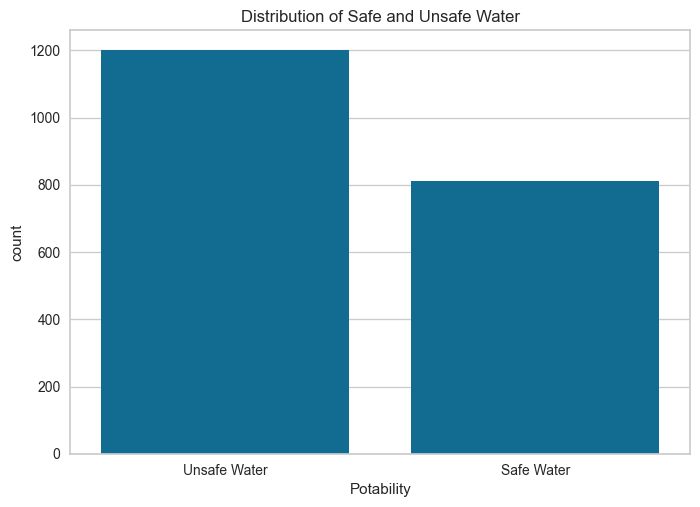

In [23]:
#sns.countplot(df.Potability)
sns.countplot(x = "Potability",data= df, saturation=0.8)
plt.xticks(ticks=[0, 1], labels = ["Unsafe Water", "Safe Water"])
plt.title("Distribution of Safe and Unsafe Water")
plt.show()

Count of potable and unfit water sample.

In [25]:
x = df.Potability.value_counts()
labels = [0,1]
print(x)

0    1200
1     811
Name: Potability, dtype: int64


As mentioned above, there are no factors that we cannot ignore that affect water quality, so let’s explore all the columns one by one.

Let’s start by looking at the ph column:

In [26]:
import plotly.express as px
figure = px.histogram(df, x = "ph", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: PH")
figure.show()

Note, the pH value of drinking water should be between 6.5 and 8.5.

The second factor affecting water quality in the dataset:

In [27]:
figure = px.histogram(df, x = "Hardness", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Hardness")
figure.show()

Note, the figure above shows the distribution of water hardness in the dataset. The hardness of water usually depends on its source, but water with a hardness of 120-200 milligrams is drinkable.

The next factor affecting water quality:

In [28]:
figure = px.histogram(df, x = "Solids", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Solids")
figure.show()

Note, the figure above represents the distribution of total dissolved solids in water in the dataset. All organic and inorganic minerals present in water are called dissolved solids. Water with a very high number of dissolved solids is highly mineralized.

The next factor affecting water quality:

In [29]:
figure = px.histogram(df, x = "Chloramines", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Chloramines")
figure.show()

Note, the figure above represents the distribution of chloramine in water in the dataset. Chloramine and chlorine are disinfectants used in public water systems.

The next factor affecting water quality:

In [30]:
figure = px.histogram(data, x = "Sulfate", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Sulfate")
figure.show()

Note, the figure above shows the distribution of sulfate in water in the dataset. They are substances naturally present in minerals, soil and rocks. Water containing less than 500 milligrams of sulfate is safe to drink.

The next factor affecting water quality:

In [31]:
figure = px.histogram(data, x = "Conductivity", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Conductivity")
figure.show()

Note, the figure above represents the distribution of water conductivity in the dataset. Water is a good conductor of electricity, but the purest form of water is not a good conductor of electricity. Water with an electrical conductivity of less than 500 is drinkable.

The next factor affecting water quality:

In [32]:
figure = px.histogram(data, x = "Organic_carbon", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Organic Carbon")
figure.show()

Note, the figure above represents the distribution of organic carbon in water in the dataset. Organic carbon comes from the breakdown of natural organic materials and synthetic sources. Water containing less than 25 milligrams of organic carbon is considered safe to drink.

The next factor that affects the quality of drinking water:

In [33]:
figure = px.histogram(data, x = "Trihalomethanes", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Trihalomethanes")
figure.show()

Note, the figure above represents the distribution of trihalomethanes or THMs in water in the dataset. THMs are chemicals found in chlorine-treated water. Water containing less than 80 milligrams of THMs is considered safe to drink.

The next factor in the dataset that affects drinking water quality:

In [34]:
figure = px.histogram(data, x = "Turbidity", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Turbidity")
figure.show()

Note, the figure above represents the distribution of turbidity in water. The turbidity of water depends on the number of solids present in suspension. Water with a turbidity of fewer than 5 milligrams is considered drinkable.

### Proportion of Potable_1 vs. Non-Potable_0 Water Samples:

In [25]:
fig =  px.pie (df, names = "Potability", hole = 0.4, template = "plotly_dark")
fig.show ()

### Scatter Plot of pH and Sulfate with Trendline and Potability Grouping:

In [35]:
fig = px.scatter (df, x = "ph", y = "Sulfate", color = "Potability", template = "plotly_dark",  trendline="ols")
fig.show ()

### Exploring the Relationship between Organic Carbon and Hardness with a Smooth Trendline:

In [36]:
fig = px.scatter (df, x = "Organic_carbon", y = "Hardness", color = "Potability", template = "plotly_dark",  trendline="lowess")
fig.show ()

## Water Quality Prediction Model

In the above section, we explored all the features that affect water quality. Now, the next step is to train a machine learning model for the task of water quality analysis using Python. For this task, I will be using the PyCaret library in Python. If you have never used this library before, you can easily install it on your system using the pip command:

--pip install pycaret

Before training a machine learning model, let’s have a look at the correlation of all the features with respect to the Potability column in the dataset:

In [10]:
correlation = df.corr()
correlation["ph"].sort_values(ascending=False)

ph                 1.000000
Hardness           0.108948
Organic_carbon     0.028375
Trihalomethanes    0.018278
Potability         0.014530
Conductivity       0.014128
Sulfate            0.010524
Chloramines       -0.024768
Turbidity         -0.035849
Solids            -0.087615
Name: ph, dtype: float64

### Correlation Heatmap of Dataset Features:

<Axes: >

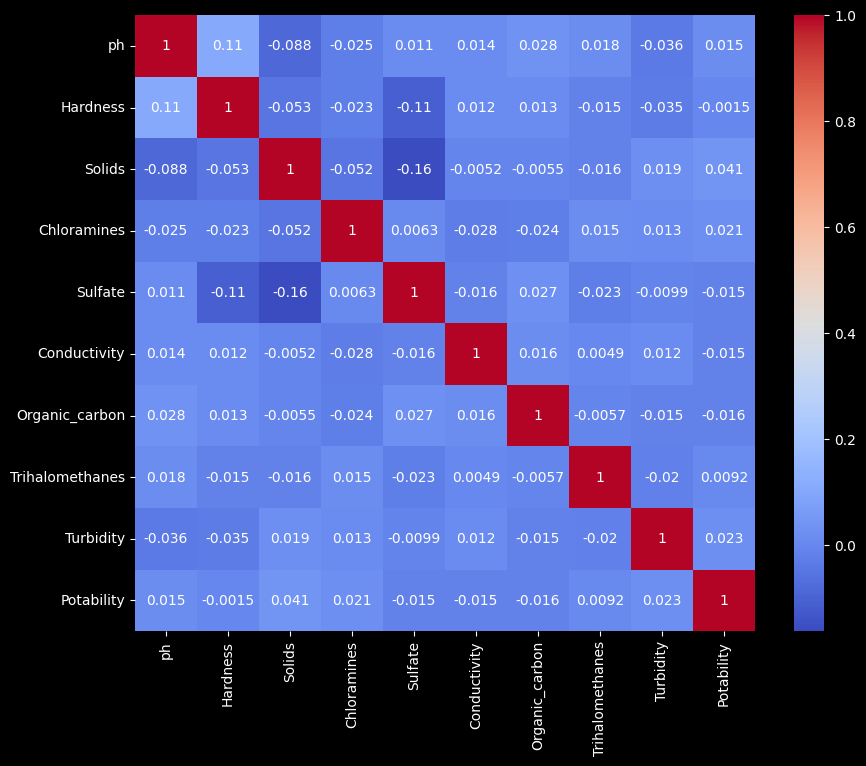

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')

### Machine Learning Algorithm that is best for the dataset by using the PyCaret library in Python:

In [12]:
from pycaret.classification import *
clf = setup(data, target="Potability", verbose=False, session_id=786)
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.6699,0.6830,0.3285,0.6573,0.4360,0.2381,0.2677,0.0150
et,Extra Trees Classifier,0.6642,0.6706,0.3062,0.6564,0.4152,0.2206,0.2538,0.1540
rf,Random Forest Classifier,0.6637,0.6738,0.3263,0.6391,0.4291,0.2256,0.2523,0.2810
lightgbm,Light Gradient Boosting Machine,0.6446,0.6596,0.4169,0.5607,0.4766,0.2170,0.2230,0.1830
xgboost,Extreme Gradient Boosting,0.6437,0.6588,0.4336,0.5571,0.4860,0.2204,0.2251,0.0990
gbc,Gradient Boosting Classifier,0.6315,0.6280,0.2280,0.5677,0.3242,0.1318,0.1574,0.2840
nb,Naive Bayes,0.6158,0.5816,0.2034,0.5256,0.2928,0.0937,0.1147,0.0170
lr,Logistic Regression,0.6136,0.5138,0.0111,0.5000,0.0217,0.0126,0.0516,0.8700
lda,Linear Discriminant Analysis,0.6136,0.5105,0.0111,0.5000,0.0217,0.0126,0.0516,0.0180
ridge,Ridge Classifier,0.6114,0.5105,0.0056,0.3000,0.0109,0.0059,0.0264,0.0170


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

Note, according to the above result, the Quadratic Discriminant Analysis, Extra Trees Classifier, Random Forecast classification algorithms are the best for training a machine learning model for the task of water quality analysis. So let’s train the model and examine its predictions:

#### Quadratic Discriminant Analysis Model:

In [13]:
model = create_model("qda")
predict = predict_model(model, data=data)
predict.head()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6261,0.6666,0.3000,0.5400,0.3857,0.1474,0.1606
1,0.6957,0.7285,0.3111,0.7778,0.4444,0.2844,0.3411
2,0.6826,0.6638,0.3444,0.6889,0.4593,0.2684,0.3007
3,0.6943,0.7315,0.3889,0.7000,0.5000,0.3049,0.3322
4,0.6376,0.6296,0.2667,0.5854,0.3664,0.1597,0.1839
5,0.6812,0.6910,0.3933,0.6481,0.4895,0.2774,0.2957
6,0.6550,0.6482,0.3034,0.6136,0.4060,0.2004,0.2251
7,0.6638,0.6839,0.2584,0.6765,0.3740,0.2027,0.2466
8,0.6638,0.6657,0.3596,0.6154,0.4539,0.2344,0.2521


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.6816,0.7083,0.3537,0.6756,0.4643,0.2681,0.2965


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,prediction_label,prediction_score
0,NaN,204.890457,20791.318359,7.300212,368.516449,564.308655,10.379783,86.990967,2.963135,0,0,0.5750
1,3.716080,129.422928,18630.058594,6.635246,NaN,592.885376,15.180013,56.329075,4.500656,0,0,0.9298
2,8.099124,224.236252,19909.541016,9.275884,NaN,418.606201,16.868637,66.420090,3.055934,0,0,0.6322
3,8.316766,214.373398,22018.417969,8.059333,356.886139,363.266510,18.436525,100.341675,4.628770,0,0,0.7357
4,9.092223,181.101517,17978.986328,6.546600,310.135742,398.410828,11.558279,31.997993,4.075076,0,0,0.5954


#### Extra Trees Classifier Model:

In [14]:
model = create_model("et")
predict = predict_model(model, data=data)
predict.head()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6522,0.6326,0.2667,0.6316,0.3750,0.1858,0.2190
1,0.6826,0.7168,0.2556,0.7931,0.3866,0.2420,0.3127
2,0.7043,0.6881,0.3444,0.7750,0.4769,0.3110,0.3607
3,0.6812,0.7069,0.3667,0.6735,0.4748,0.2735,0.2996
4,0.6114,0.6446,0.2667,0.5106,0.3504,0.1105,0.1224
5,0.7118,0.7216,0.3483,0.7949,0.4844,0.3244,0.3776
6,0.6332,0.6297,0.2697,0.5581,0.3636,0.1479,0.1672
7,0.6332,0.6279,0.2472,0.5641,0.3438,0.1401,0.1631
8,0.6463,0.6591,0.3483,0.5741,0.4336,0.1982,0.2113


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8996,0.9710,0.7981,0.9349,0.8611,0.7832,0.7892


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,prediction_label,prediction_score
0,NaN,204.890457,20791.318359,7.300212,368.516449,564.308655,10.379783,86.990967,2.963135,0,0,1.00
1,3.716080,129.422928,18630.058594,6.635246,NaN,592.885376,15.180013,56.329075,4.500656,0,0,1.00
2,8.099124,224.236252,19909.541016,9.275884,NaN,418.606201,16.868637,66.420090,3.055934,0,0,1.00
3,8.316766,214.373398,22018.417969,8.059333,356.886139,363.266510,18.436525,100.341675,4.628770,0,0,0.55
4,9.092223,181.101517,17978.986328,6.546600,310.135742,398.410828,11.558279,31.997993,4.075076,0,0,1.00


#### Random Forecast Classification Model:

In [18]:
model = create_model("rf")
predict = predict_model(model, data=data)
predict.head()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6478,0.6558,0.2778,0.6098,0.3817,0.1811,0.2085
1,0.6652,0.6970,0.2333,0.7241,0.3529,0.2005,0.2590
2,0.7130,0.6937,0.4111,0.7400,0.5286,0.3457,0.3766
3,0.6900,0.7355,0.4000,0.6792,0.5035,0.2994,0.3216
4,0.6201,0.6362,0.2778,0.5319,0.3650,0.1305,0.1445
5,0.7031,0.6734,0.3596,0.7442,0.4848,0.3102,0.3507
6,0.6332,0.6654,0.3258,0.5472,0.4085,0.1667,0.1785
7,0.6463,0.6498,0.2809,0.5952,0.3817,0.1764,0.2009
8,0.6550,0.6458,0.3708,0.5893,0.4552,0.2215,0.2342


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9026,0.9666,0.8099,0.9316,0.8665,0.7904,0.7952


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,prediction_label,prediction_score
0,NaN,204.890457,20791.318359,7.300212,368.516449,564.308655,10.379783,86.990967,2.963135,0,0,0.87
1,3.716080,129.422928,18630.058594,6.635246,NaN,592.885376,15.180013,56.329075,4.500656,0,0,0.81
2,8.099124,224.236252,19909.541016,9.275884,NaN,418.606201,16.868637,66.420090,3.055934,0,0,0.89
3,8.316766,214.373398,22018.417969,8.059333,356.886139,363.266510,18.436525,100.341675,4.628770,0,0,0.55
4,9.092223,181.101517,17978.986328,6.546600,310.135742,398.410828,11.558279,31.997993,4.075076,0,0,0.90


## Summary

This is an overview of how to analyze water quality and train a machine learning model to classify water samples as either safe or unsafe for drinking. Access to clean and safe drinking water is a basic human necessity and is recognized as a fundamental human right. Given the numerous factors that influence water quality, this field represents a significant area of research in machine learning.